Метрики для модели Логистическая регрессия:
Accuracy: 0.74
Precision: 0.64
Recall: 0.59
F1-score: 0.61
ROC-AUC: 0.70

Метрики для модели Решающее дерево:
Accuracy: 0.70
Precision: 0.56
Recall: 0.62
F1-score: 0.59
ROC-AUC: 0.68



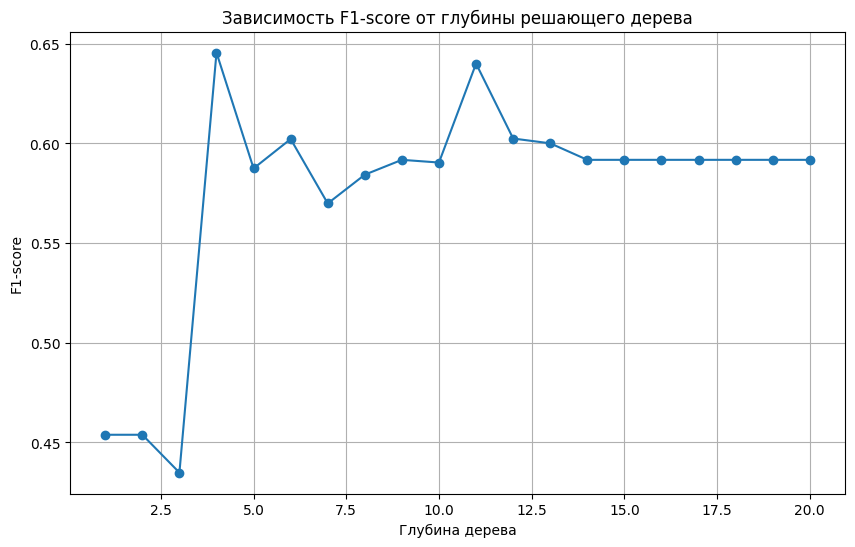

Оптимальная глубина дерева: 4


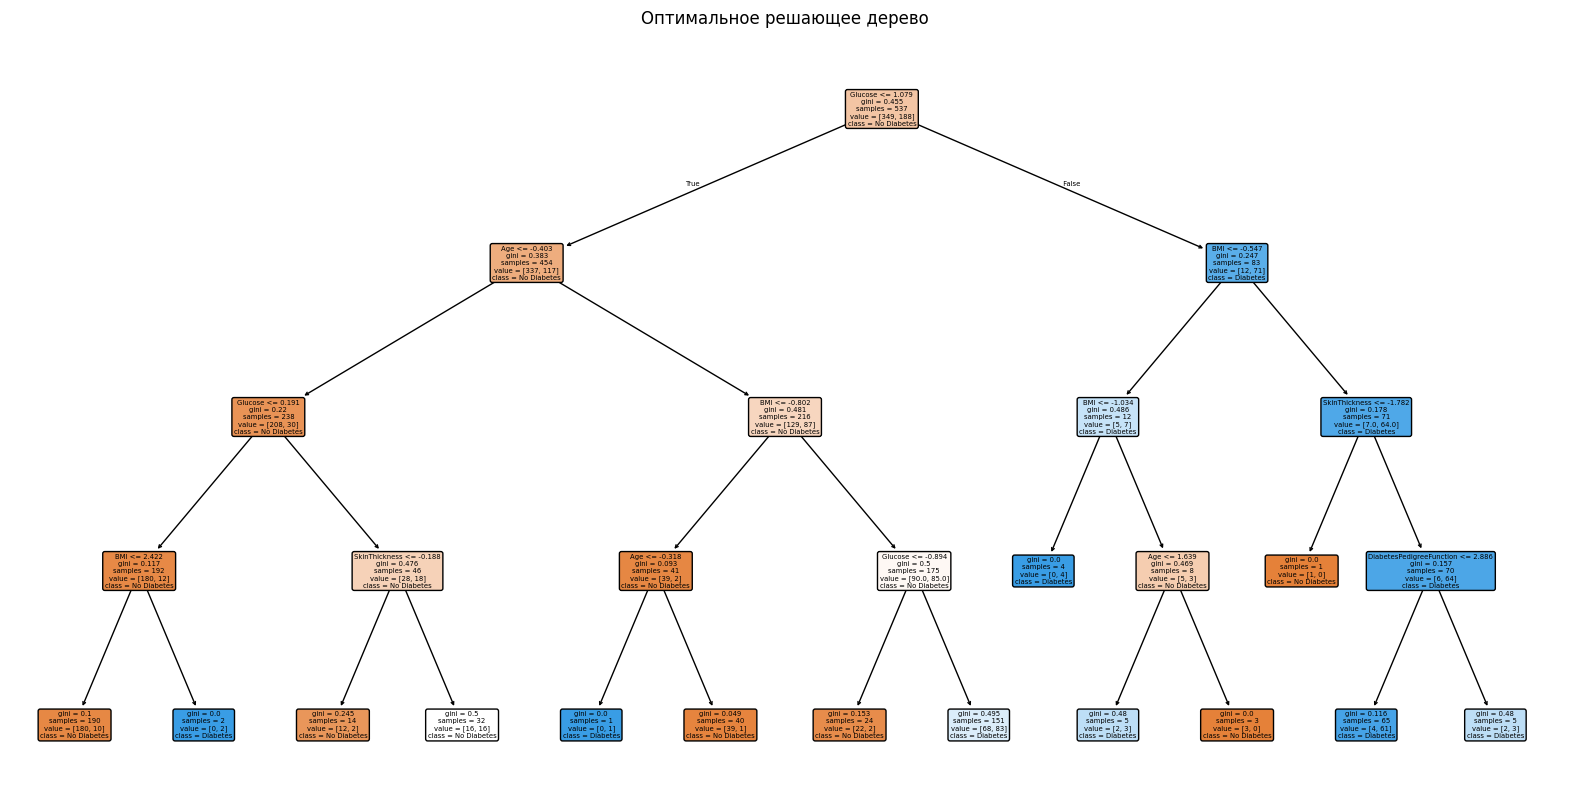

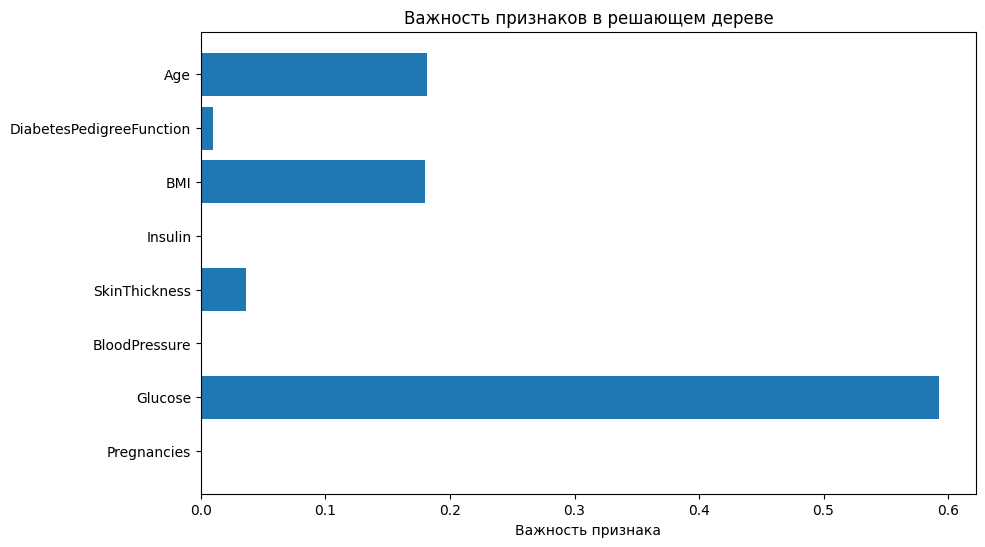

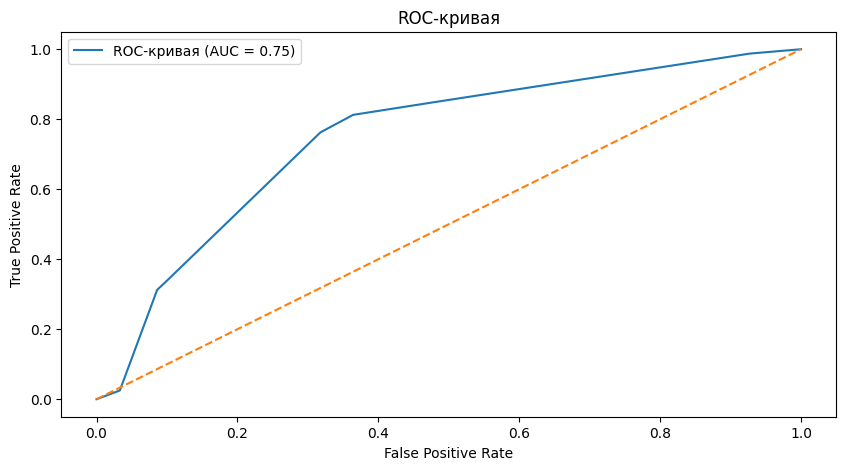

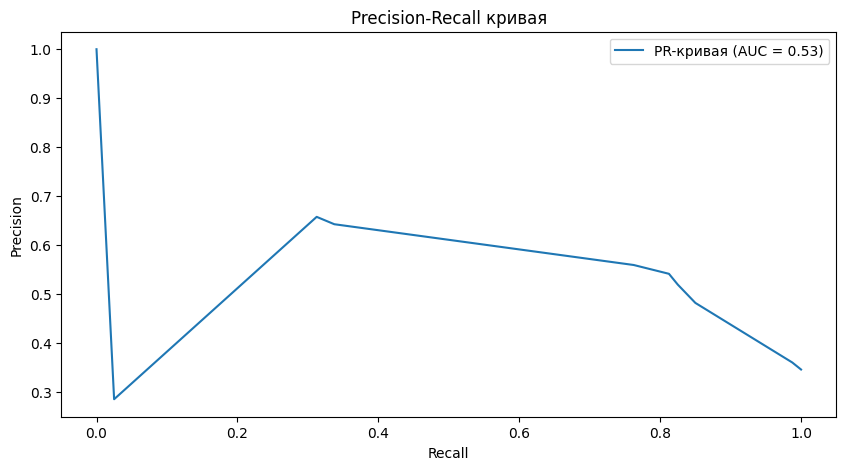

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    roc_curve,
    precision_recall_curve,
    auc,
)
from sklearn.preprocessing import StandardScaler


data = pd.read_csv("diabetes.csv")

# Предобработка данных
zero_features = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
for feature in zero_features:
    data[feature] = data[feature].replace(0, np.nan)
    mean = data[feature].mean()
    data[feature] = data[feature].fillna(mean)

# Разделение на признаки и целевую переменную
X = data.drop("Outcome", axis=1)
y = data["Outcome"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42
)

# 1: Сравнение логистической регрессии и решающего дерева
# Логистическая регрессия
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

# Решающее дерево 
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

# Вывод метрик
def print_metrics(y_true, y_pred, model_name):
    print(f"Метрики для модели {model_name}:")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.2f}")
    print(f"Precision: {precision_score(y_true, y_pred):.2f}")
    print(f"Recall: {recall_score(y_true, y_pred):.2f}")
    print(f"F1-score: {f1_score(y_true, y_pred):.2f}")
    print(f"ROC-AUC: {roc_auc_score(y_true, y_pred):.2f}\n")

print_metrics(y_test, y_pred_log_reg, "Логистическая регрессия")
print_metrics(y_test, y_pred_tree, "Решающее дерево")

# Задача 2: Исследование F1-score в зависимости от глубины дерева
max_depths = range(1, 21)
f1_scores = []

for depth in max_depths:
    tree_depth = DecisionTreeClassifier(max_depth=depth, random_state=42)
    tree_depth.fit(X_train, y_train)
    y_pred_depth = tree_depth.predict(X_test)
    f1_scores.append(f1_score(y_test, y_pred_depth))

# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(max_depths, f1_scores, marker="o")
plt.xlabel("Глубина дерева")
plt.ylabel("F1-score")
plt.title("Зависимость F1-score от глубины решающего дерева")
plt.grid(True)
plt.show()

# Оптимальная глубина
optimal_depth = max_depths[np.argmax(f1_scores)]
print(f"Оптимальная глубина дерева: {optimal_depth}")

# Задача 3: Визуализация оптимального дерева и метрик
# Обучение дерева с оптимальной глубиной
optimal_tree = DecisionTreeClassifier(max_depth=optimal_depth, random_state=42)
optimal_tree.fit(X_train, y_train)

# Визуализация дерева с помощью plot_tree
plt.figure(figsize=(20, 10))
plot_tree(
    optimal_tree,
    feature_names=X.columns,
    class_names=["No Diabetes", "Diabetes"],
    filled=True,
    rounded=True,
)
plt.title("Оптимальное решающее дерево")
plt.show()

# Важность признаков
feature_importances = optimal_tree.feature_importances_
plt.figure(figsize=(10, 6))
plt.barh(X.columns, feature_importances)
plt.xlabel("Важность признака")
plt.title("Важность признаков в решающем дереве")
plt.show()

# PR и ROC кривые
y_prob_tree = optimal_tree.predict_proba(X_test)[:, 1]

# ROC-кривая
fpr, tpr, _ = roc_curve(y_test, y_prob_tree)
roc_auc = roc_auc_score(y_test, y_prob_tree)

plt.figure(figsize=(10, 5))
plt.plot(fpr, tpr, label=f"ROC-кривая (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-кривая")
plt.legend()
plt.show()

# PR-кривая
precision, recall, _ = precision_recall_curve(y_test, y_prob_tree)
pr_auc = auc(recall, precision)

plt.figure(figsize=(10, 5))
plt.plot(recall, precision, label=f"PR-кривая (AUC = {pr_auc:.2f})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall кривая")
plt.legend()
plt.show()

Логистическая регрессия предпочтительнее, так как демонстрирует более высокие значения Accuracy (0.74), Precision (0.64), F1-score (0.61) и ROC-AUC (0.70), что указывает на лучшее обобщение и баланс между точностью и полнотой предсказаний.